In [1]:
#tensorflow 2.2.2
#others newest
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras import Input
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K


import tensorflow as tf
from glob import glob
import pickle
import numpy as np
import random
import os
import tqdm.keras as tk
from tqdm.keras import TqdmCallback
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import math 
#from keras.layers.normalization import BatchNormalization

In [2]:
train_path = "./new_train/new_train"
test_path = "./new_val_in/new_val_in"

In [3]:
def train_generator_x(training_list, batch_size):
    index = 0
    print(len(training_list))
    while True:
#         train_x = np.empty((batch_size,19))
        train_x = np.empty((batch_size,38))
        train_y = np.empty((batch_size,30))

        for i in range(batch_size):
            train_path = training_list[index]
            with open(train_path, 'rb') as f:
                data = pickle.load(f)                
                agent_id = data['agent_id']
                idx = np.where(data["track_id"] == data["agent_id"])[0][0]
                
                # choose a random number between 0 and the target agent idx
                idx = random.randint(0, idx)
                
                #position
                input_pos_in_data = data['p_in'][idx,:,:]                
                input_pos_in_x = (input_pos_in_data[:,0]).reshape(1,19)
                
#                 train_x[i,:] = input_pos_in_x
                
                #velocity
                input_vel_in_data = data['v_in'][idx,:,:]                
                input_vel_in_x = (input_vel_in_data[:,0]).reshape(1,19)
                
                #Combine position and velocity together into (1,38)
                input_combine_x = np.concatenate((input_pos_in_x, input_vel_in_x), axis=0).reshape(1,38)
                
#                 city <-- shape(1,39)
#                 input_city = data['city']
#                 if input_city == "PIT":
#                     input_combine_x = np.append(input_combine_x, -1)
#                 elif input_city == "MIA":
#                     input_combine_x = np.append(input_combine_x, 1)
                      
                        
                #train_x[i,:] = input_combine_x   #shape = (1,39)
                
                #input_combine_x = input_combine_x.reshape(1,39)
                
                #--------------------------Lane Info--------------------------
                
#                 # Find the closest lane with the corresponding lane_norm
#                 input_lane = data['lane']
#                 input_lane_norm = data['lane_norm']
#                 num_lane = input_lane.shape[0]
#                 closest_lane_idx = -2
                
#                 # Initialize distance = +inf
#                 cur_distance = float('inf')
                
#                 # Start Iterating
#                 for time_step in range(19):
#                     for lane_idx in range(num_lane):
#                         diff_x = data['p_in'][idx,time_step,0] - input_lane[lane_idx,0]
#                         diff_y = data['p_in'][idx,time_step,1] - input_lane[lane_idx,1]
#                         temp = diff_x ** 2 + diff_y ** 2
#                         if temp < cur_distance:
#                             cur_distance = temp
#                             closest_lane_idx = lane_idx
                    
#                     #Put lane_x position and lane_x_velocity into the input feature 
#                     input_combine_x = np.append(input_combine_x, input_lane[closest_lane_idx,0])
#                     input_combine_x = np.append(input_combine_x, input_lane_norm[closest_lane_idx,0])
                    
                #-----Now input feature shape = (1,77)
                    
                            
                            
                
                
                
                
                
                
#                 # add number of lanes in input feature 
#                 input_lane = data['lane']
#                 num_lanes = input_lane.shape[0]     # num_lanes = k
#                 input_combine_x = np.append(input_combine_x, num_lanes)           #shape = (1,40)
#                 input_combine_x = input_combine_x.reshape(1,40)
                
                
#                 #add lane info of x-coordinate in input feature
#                 temp_lane_arr = [0] * 1299
#                 for k in range(1299):
#                     if k == num_lanes:
#                         break
#                     temp_lane_arr[k] = input_lane[k,0]
                
#                 temp_input = input_combine_x.flatten()              
#                 input_combine_x = np.append(temp_input,temp_lane_arr).reshape(1,1339) 
                
                
#                 #add lane norm info of x-coordinate in input feature
#                 input_lane = data['lane_norm']
#                 temp_lane_norm_arr = [0] * 1299
#                 for k in range(1299):
#                     if k == num_lanes:
#                         break
#                     temp_lane_norm_arr[k] = input_lane[k,0]            
                
#                 temp_input = input_combine_x.flatten()              
#                 input_combine_x = np.append(temp_input,temp_lane_norm_arr).reshape(1,2638) 
                
                train_x[i,:] = input_combine_x            
                
                output_pos_out_data = data['p_out'][idx,:,:]
                output_pos_out_x = (output_pos_out_data[:,0]).reshape(1,30)
                train_y[i,:] = output_pos_out_x
            index += 1
            
        if index == len(training_list):
            index = 0
        yield train_x, train_y

def valid_generator_x(valid_list, batch_size):
    print("we are in vad")
    index = 0
    while True:
        valid_x = np.empty((batch_size,38))
        valid_y = np.empty((batch_size,30))
        for i in range(batch_size):
            valid_path = valid_list[index]
            with open(valid_path, 'rb') as f:
                data = pickle.load(f)
                agent_id = data['agent_id']
                idx = np.where(data["track_id"] == data["agent_id"])[0][0]
                
                # choose a random number between 0 and the target agent idx
                idx = random.randint(0, idx)
                
                
                input_data = data['p_in'][idx,:,:]
                input_pos_in_x = (input_data[:,0]).reshape(1,19)
#                 valid_x[i,:] = input_data1
                
                #velocity
                input_vel_in_data = data['v_in'][idx,:,:]                
                input_vel_in_x = (input_vel_in_data[:,0]).reshape(1,19)
                
                #Combine position and velocity together into (1,38)
                input_combine_x = np.concatenate((input_pos_in_x, input_vel_in_x), axis=0).reshape(1,38)
                
                # add city
#                 input_city = data['city']
#                 if input_city == "PIT":
#                     input_combine_x = np.append(input_combine_x, -1)
#                 elif input_city == "MIA":
#                     input_combine_x = np.append(input_combine_x, 1)
               
                 #input_combine_x = input_combine_x.reshape(1,39)

                
#                 #--------------------------Lane Info--------------------------
                
#                 # Find the closest lane with the corresponding lane_norm
#                 input_lane = data['lane']
#                 input_lane_norm = data['lane_norm']
#                 num_lane = input_lane.shape[0]
#                 closest_lane_idx = -2
                
#                 # Initialize distance = +inf
#                 cur_distance = float('inf')
                
#                 # Start Iterating
#                 for time_step in range(19):
#                     for lane_idx in range(num_lane):
#                         diff_x = data['p_in'][idx,time_step,0] - input_lane[lane_idx,0]
#                         diff_y = data['p_in'][idx,time_step,1] - input_lane[lane_idx,1]
#                         temp = diff_x ** 2 + diff_y ** 2
#                         if temp < cur_distance:
#                             cur_distance = temp
#                             closest_lane_idx = lane_idx
                    
#                     #Put lane_x position and lane_x_velocity into the input feature 
#                     input_combine_x = np.append(input_combine_x, input_lane[closest_lane_idx,0])
#                     input_combine_x = np.append(input_combine_x, input_lane_norm[closest_lane_idx,0])
                    
#                 #-----Now input feature shape = (1,77)
                
                
                
                
                
                
#                 # add number of lanes in input feature 
#                 input_lane = data['lane']
#                 num_lanes = input_lane.shape[0]     # num_lanes = k
#                 input_combine_x = np.append(input_combine_x, num_lanes)           #shape = (1,40)
#                 input_combine_x = input_combine_x.reshape(1,40)
                
#                 #add lane info of x-coordinate in input feature
#                 temp_lane_arr = [0] * 1299
#                 for k in range(1299):
#                     if k == num_lanes:
#                         break
#                     temp_lane_arr[k] = input_lane[k,0]
                
#                 temp_input = input_combine_x.flatten()              
#                 input_combine_x = np.append(temp_input,temp_lane_arr).reshape(1,1339) 
                
                
#                 #add lane norm info of x-coordinate in input feature
#                 input_lane = data['lane_norm']
#                 temp_lane_norm_arr = [0] * 1299
#                 for k in range(1299):
#                     if k == num_lanes:
#                         break
#                     temp_lane_norm_arr[k] = input_lane[k,0]            
                
#                 temp_input = input_combine_x.flatten()              
#                 input_combine_x = np.append(temp_input,temp_lane_norm_arr).reshape(1,2638) 
                
                
                valid_x[i,:] = input_combine_x   
                
                output_data = data['p_out'][idx,:,:]
                output_data1 = (output_data[:,0]).reshape(1,30)
                valid_y[i,:] = output_data1
            index += 1
        if index == len(valid_list):
            index = 0
        yield valid_x, valid_y

In [4]:
def train_generator_y(training_list, batch_size):
    index = 0
    print(len(training_list))
    while True:
        train_x = np.empty((batch_size,38))
        train_y = np.empty((batch_size,30))

        for i in range(batch_size):            
            train_path = training_list[index]
            with open(train_path, 'rb') as f:
                data = pickle.load(f)                
                agent_id = data['agent_id']
                idx = np.where(data["track_id"] == data["agent_id"])[0][0]
                
                # choose a random number between 0 and the target agent idx
                idx = random.randint(0, idx)
                
                input_pos_in_data = data['p_in'][idx,:,:]                
                input_pos_in_y = (input_pos_in_data[:,1]).reshape(1,19)
#                 train_x[i,:] = input_pos_in_y
    
                #velocity
                input_vel_in_data = data['v_in'][idx,:,:]                
                input_vel_in_y = (input_vel_in_data[:,1]).reshape(1,19)
                
                #Combine position and velocity together into (1,38)
                input_combine_y = np.concatenate((input_pos_in_y, input_vel_in_y), axis=0).reshape(1,38)
                
                #city
#                 input_city = data['city']
#                 if input_city == "PIT":
#                     input_combine_y = np.append(input_combine_y, -1)
#                 elif input_city == "MIA":
#                     input_combine_y = np.append(input_combine_y, 1)
                
#                 #input_combine_y = input_combine_y.reshape(1,39)
                
                
#                 #--------------------------Lane Info--------------------------
                
#                 # Find the closest lane with the corresponding lane_norm
#                 input_lane = data['lane']
#                 input_lane_norm = data['lane_norm']
#                 num_lane = input_lane.shape[0]
#                 closest_lane_idx = -2
                
#                 # Initialize distance = +inf
#                 cur_distance = float('inf')
                
#                 # Start Iterating
#                 for time_step in range(19):
#                     for lane_idx in range(num_lane):
#                         diff_x = data['p_in'][idx,time_step,0] - input_lane[lane_idx,0]
#                         diff_y = data['p_in'][idx,time_step,1] - input_lane[lane_idx,1]
#                         temp = diff_x ** 2 + diff_y ** 2
#                         if temp < cur_distance:
#                             cur_distance = temp
#                             closest_lane_idx = lane_idx
                    
#                     #Put lane_y position and lane_y_velocity into the input feature 
#                     input_combine_y = np.append(input_combine_y, input_lane[closest_lane_idx,1])
#                     input_combine_y = np.append(input_combine_y, input_lane_norm[closest_lane_idx,1])
                    
#                 #-----Now input feature shape = (1,77)
                
                
                
                
                
#                 # add number of lanes in input feature 
#                 input_lane = data['lane']
#                 num_lanes = input_lane.shape[0]     # num_lanes = k
#                 input_combine_y = np.append(input_combine_y, num_lanes)           #shape = (1,40)
#                 input_combine_y = input_combine_y.reshape(1,40)
                
                
#                 #add lane info of y-coordinate in input feature
#                 temp_lane_arr = [0] * 1299
#                 for k in range(1299):
#                     if k == num_lanes:
#                         break
#                     temp_lane_arr[k] = input_lane[k,1]
                
#                 temp_input = input_combine_y.flatten()              
#                 input_combine_y = np.append(temp_input,temp_lane_arr).reshape(1,1339) 
                
                
#                 #add lane norm info of y-coordinate in input feature
#                 input_lane = data['lane_norm']
#                 temp_lane_norm_arr = [0] * 1299
#                 for k in range(1299):
#                     if k == num_lanes:
#                         break
#                     temp_lane_norm_arr[k] = input_lane[k,1]            
                
#                 temp_input = input_combine_y.flatten()              
#                 input_combine_y = np.append(temp_input,temp_lane_norm_arr).reshape(1,2638) 
                
            
                train_x[i,:] = input_combine_y   #shape = (1,1339)   
    
    
                output_pos_out_data = data['p_out'][idx,:,:]
                output_pos_out_y = (output_pos_out_data[:,1]).reshape(1,30)
                train_y[i,:] = output_pos_out_y
            index += 1
            
        if index == len(training_list):
            index = 0
        yield train_x, train_y

def valid_generator_y(valid_list, batch_size):
    print("we are in vad")
    index = 0
    while True:
        valid_x = np.empty((batch_size,38))
        valid_y = np.empty((batch_size,30))
        for i in range(batch_size):
            valid_path = valid_list[index]
            with open(valid_path, 'rb') as f:
                data = pickle.load(f)
                agent_id = data['agent_id']
                idx = np.where(data["track_id"] == data["agent_id"])[0][0]
                
                # choose a random number between 0 and the target agent idx
                idx = random.randint(0, idx)
                
                input_data = data['p_in'][idx,:,:]
                input_pos_in_y = (input_data[:,1]).reshape(1,19)
#                 valid_x[i,:] = input_data1
                
                # add velocity
                input_vel_in_data = data['v_in'][idx,:,:]                
                input_vel_in_y = (input_vel_in_data[:,1]).reshape(1,19)
                
                #Combine position and velocity together into (1,38)
                input_combine_y = np.concatenate((input_pos_in_y, input_vel_in_y), axis=0).reshape(1,38)
                
                # add city
#                 input_city = data['city']
#                 if input_city == "PIT":
#                     input_combine_y = np.append(input_combine_y, -1)
#                 elif input_city == "MIA":
#                     input_combine_y = np.append(input_combine_y, 1)
                    
#                 #input_combine_y = input_combine_y.reshape(1,39)
                    
                    
#                 #--------------------------Lane Info--------------------------
                
#                 # Find the closest lane with the corresponding lane_norm
#                 input_lane = data['lane']
#                 input_lane_norm = data['lane_norm']
#                 num_lane = input_lane.shape[0]
#                 closest_lane_idx = -2
                
#                 # Initialize distance = +inf
#                 cur_distance = float('inf')
                
#                 # Start Iterating
#                 for time_step in range(19):
#                     for lane_idx in range(num_lane):
#                         diff_x = data['p_in'][idx,time_step,0] - input_lane[lane_idx,0]
#                         diff_y = data['p_in'][idx,time_step,1] - input_lane[lane_idx,1]
#                         temp = diff_x ** 2 + diff_y ** 2
#                         if temp < cur_distance:
#                             cur_distance = temp
#                             closest_lane_idx = lane_idx
                    
#                     #Put lane_y position and lane_y_velocity into the input feature 
#                     input_combine_y = np.append(input_combine_y, input_lane[closest_lane_idx,1])
#                     input_combine_y = np.append(input_combine_y, input_lane_norm[closest_lane_idx,1])
                    
#                 #-----Now input feature shape = (1,77)   
                
                
            
#                 # add number of lanes in input feature 
#                 input_lane = data['lane']
#                 num_lanes = input_lane.shape[0]     # num_lanes = k
#                 input_combine_y = np.append(input_combine_y, num_lanes)           #shape = (1,40)
#                 input_combine_y = input_combine_y.reshape(1,40)
                
                
#                 #add lane info of y-coordinate in input feature
#                 temp_lane_arr = [0] * 1299
#                 for k in range(1299):
#                     if k == num_lanes:
#                         break
#                     temp_lane_arr[k] = input_lane[k,1]
                
#                 temp_input = input_combine_y.flatten()              
#                 input_combine_y = np.append(temp_input,temp_lane_arr).reshape(1,1339)    
                
                
                
#                 #add lane norm info of y-coordinate in input feature
#                 input_lane = data['lane_norm']
#                 temp_lane_norm_arr = [0] * 1299
#                 for k in range(1299):
#                     if k == num_lanes:
#                         break
#                     temp_lane_norm_arr[k] = input_lane[k,1]            
                
#                 temp_input = input_combine_y.flatten()              
#                 input_combine_y = np.append(temp_input,temp_lane_norm_arr).reshape(1,2638) 
                
                valid_x[i,:] = input_combine_y 
                
                
                output_data = data['p_out'][idx,:,:]
                output_data1 = (output_data[:,1]).reshape(1,30)
                valid_y[i,:] = output_data1
            index += 1
        if index == len(valid_list):
            index = 0
        yield valid_x, valid_y

In [5]:
data_list = glob(os.path.join(train_path, '*'))
random.shuffle(data_list)
print(int(len(data_list)*1))
data_list = data_list[:len(data_list)]
print(int(len(data_list)*1))

train_list = data_list[:int(len(data_list)*0.9)-47]
valid_list = data_list[int(len(data_list)*0.9)+95:]
print(len(train_list))
print(len(valid_list))

205942
205942
185300
20500


In [6]:
#Model structure
#input shape (38) = 19x2
#output shape(60) = 30x2

model_x = Sequential()
model_x.add(Input(shape=(38)))
model_x.add(Dense(units=512, activation='elu'))
model_x.add(Dense(units=512, activation='elu'))
model_x.add(Dense(units=30, activation='linear'))

model_y = Sequential()
model_y.add(Input(shape=(38)))
model_y.add(Dense(units=512, activation='elu'))
model_y.add(Dense(units=512, activation='elu'))
model_y.add(Dense(units=30, activation='linear'))

In [7]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

model_x.compile(loss=root_mean_squared_error, optimizer='adam')
checkpointer_x = ModelCheckpoint(filepath='./liner_regressor_x_weights.hdf5', verbose=2, save_best_only=True, mode='min')



In [8]:
model_y.compile(loss=root_mean_squared_error, optimizer='adam')
checkpointer_y = ModelCheckpoint(filepath='./liner_regressor_y_weights.hdf5', verbose=2, save_best_only=True, mode='min')

In [9]:
batch_s = 20
print('training...')
num_train = len(train_list)/batch_s
num_test = len(valid_list)/batch_s
maxLane = 0
train_gen_x = train_generator_x(train_list,batch_s)
valid_gen_x = valid_generator_x(valid_list,batch_s)

train_gen_y = train_generator_y(train_list,batch_s)
valid_gen_y = valid_generator_y(valid_list,batch_s)

training...


In [10]:
hist_x=model_x.fit(train_gen_x,
                        verbose=2,
                        epochs=1,
                        validation_data=valid_gen_x,
                        steps_per_epoch=(len(train_list)/batch_s),
                        validation_steps=(len(valid_list)/batch_s),
                        callbacks=[checkpointer_x,TqdmCallback(verbose=2)]
                        )


185300


we are in vad

Epoch 00001: val_loss improved from inf to 8.55817, saving model to ./liner_regressor_x_weights.hdf5
9265/9265 - 388s - loss: 20.8956 - val_loss: 8.5582




In [11]:
model_x.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               19968     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 30)                15390     
Total params: 298,014
Trainable params: 298,014
Non-trainable params: 0
_________________________________________________________________


In [12]:
hist_y=model_y.fit(train_gen_y,
                        verbose=2,
                        epochs=1,
                        validation_data=valid_gen_y,
                        steps_per_epoch=(len(train_list)/batch_s),
                        validation_steps=(len(valid_list)/batch_s),
                        callbacks=[checkpointer_y,TqdmCallback(verbose=2)]
                        )

185300


we are in vad

Epoch 00001: val_loss improved from inf to 15.75695, saving model to ./liner_regressor_y_weights.hdf5
9265/9265 - 391s - loss: 21.9175 - val_loss: 15.7570




In [13]:
model_y.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               19968     
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 30)                15390     
Total params: 298,014
Trainable params: 298,014
Non-trainable params: 0
_________________________________________________________________


drawing the training process...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Attempting to set identical left == right == 1 results in singular transformations; automatically expanding.
  if __name__ == '__main__':


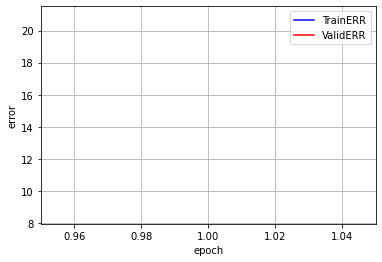

In [14]:
epoch = 1
TrainERR=hist_x.history['loss']
ValidERR=hist_x.history['val_loss']
# print('@%f, Minimun error:%f, at iteration: %i' % (hist.history['val_loss'][epoch-1], np.min(np.asarray(ValidERR)),np.argmin(np.asarray(ValidERR))+1))
print('drawing the training process...')
plt.figure(2)
plt.plot(range(1,epoch+1),TrainERR,'b',label='TrainERR')
plt.plot(range(1,epoch+1),ValidERR,'r',label='ValidERR')
plt.xlim([1,epoch])
plt.legend()
plt.xlabel('epoch')
plt.ylabel('error')
plt.grid(True)
plt.show()

drawing the training process...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Attempting to set identical left == right == 1 results in singular transformations; automatically expanding.
  if __name__ == '__main__':


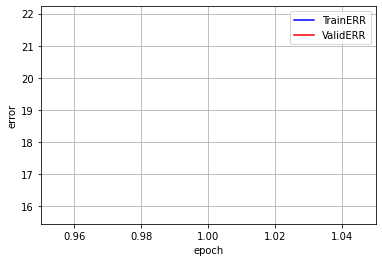

In [15]:
epoch = 1
TrainERR=hist_y.history['loss']
ValidERR=hist_y.history['val_loss']
# print('@%f, Minimun error:%f, at iteration: %i' % (hist.history['val_loss'][epoch-1], np.min(np.asarray(ValidERR)),np.argmin(np.asarray(ValidERR))+1))
print('drawing the training process...')
plt.figure(2)
plt.plot(range(1,epoch+1),TrainERR,'b',label='TrainERR')
plt.plot(range(1,epoch+1),ValidERR,'r',label='ValidERR')
plt.xlim([1,epoch])
plt.legend()
plt.xlabel('epoch')
plt.ylabel('error')
plt.grid(True)
plt.show()

In [16]:
print("max lanes: ")
print(maxLane)

#max # of lanes = 1899 

max lanes: 
0


In [17]:
columns = []
columns.append("ID")
for i in range(30):
    num = "v"+str(i+1)
    columns.append(num)
    
df_x = pd.DataFrame(columns=columns)
df_y = pd.DataFrame(columns=columns)

In [18]:
df_x

,ID,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30


In [19]:
df_y

,ID,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30


In [20]:
test_list = glob(os.path.join(test_path, '*'))
print(len(test_list))

#correct
for x in tqdm(test_list):
    test_pos_in_x = np.empty((1,19))
    with open(x, 'rb') as f:
        data = pickle.load(f)
        new_row = []
        scene_id = data['scene_idx']     # new_row = [scene_idx]
        new_row.append(scene_id)
        agent_id = data['agent_id']
        idx = np.where(data["track_id"] == data["agent_id"])[0][0]   
        
        
        #Position
        input_data_pos = data['p_in'][idx,:,:]     #data['p_in'] = (vehicle_idx, timestep, coordinate axis)
        test_pos_in_x[0,:] = (input_data_pos[:,0]).reshape(1,19)

        
        test_vel_in_x = np.empty((1,19))
        #Velocity
        input_data_vel_x = data['v_in'][idx,:,:]     
        test_vel_in_x[0,:] = (input_data_vel_x[:,0]).reshape(1,19)
        
        #Combine position and velocity together into (1,38)
        input_combine_x = np.concatenate((test_pos_in_x, test_vel_in_x), axis=0).reshape(1,38)

        # add city
        input_city = data['city']
        if input_city == "PIT":
            input_combine_x = np.append(input_combine_x, -1)
        elif input_city == "MIA":
            input_combine_x = np.append(input_combine_x, 1)
        
    
#         print(input_combine_x)
#         # Find the closest lane with the corresponding lane_norm
#         input_lane = data['lane']
#         input_lane_norm = data['lane_norm']
#         num_lane = input_lane.shape[0]
#         closest_lane_idx = -2

#         # Initialize distance = +inf
#         cur_distance = float('inf')

#         # Start Iterating
#         for time_step in range(19):
#             for lane_idx in range(num_lane):
#                 diff_x = data['p_in'][idx,time_step,0] - input_lane[lane_idx,0]
#                 diff_y = data['p_in'][idx,time_step,1] - input_lane[lane_idx,1]
#                 temp = diff_x ** 2 + diff_y ** 2
#                 if temp < cur_distance:
#                     cur_distance = temp
#                     closest_lane_idx = lane_idx

#             #Put lane_y position and lane_y_velocity into the input feature 
#             input_combine_x = np.append(input_combine_x, input_lane[closest_lane_idx,0])
#             input_combine_x = np.append(input_combine_x, input_lane_norm[closest_lane_idx,0])

#          #-----Now input feature shape = (1,77)
    
    
    
    
        input_combine_x = input_combine_x.reshape(1,39)
        
#         # add number of lanes in input feature 
#         input_lane = data['lane']
#         num_lanes = input_lane.shape[0]     # num_lanes = k
#         input_combine_x = np.append(input_combine_x, num_lanes)           #shape = (1,40)
#         input_combine_x = input_combine_x.reshape(1,40)
        
        
        test_pos_out_x = model_x.predict(input_combine_x)

#         print(test_pos_out_x)
        for i in range(30):
            new_row.append(test_pos_out_x[0][i])   # new_row = [scene_idx, p_out_x1, p_out_x2 ..., p_out_x30]
            
        df_length = len(df_x)              # len(df_x) is the number of rows in the current dataFrame
        df_x.loc[df_length] = new_row

        
        
for x in tqdm(test_list):
    test_pos_in_y = np.empty((1,19))
    with open(x, 'rb') as f:
        data = pickle.load(f)
        new_row = []
        scene_id = data['scene_idx']
        new_row.append(scene_id)
        agent_id = data['agent_id']
        idx = np.where(data["track_id"] == data["agent_id"])[0][0]   
        
        #Position
        input_data_pos = data['p_in'][idx,:,:]
        test_pos_in_y[0,:] = (input_data_pos[:,1]).reshape(1,19)
        
        test_vel_in_y = np.empty((1,19))
        #Velocity
        input_data_vel_y = data['v_in'][idx,:,:]     
        test_vel_in_y[0,:] = (input_data_vel_y[:,1]).reshape(1,19)
        
        #Combine position and velocity together into (1,38)
        input_combine_y = np.concatenate((test_pos_in_y, test_vel_in_y), axis=0).reshape(1,38)
        
        # add city
        input_city = data['city']
        if input_city == "PIT":
            input_combine_y = np.append(input_combine_y, -1)
        elif input_city == "MIA":
            input_combine_y = np.append(input_combine_y, 1)
        
        
#         # Find the closest lane with the corresponding lane_norm
#         input_lane = data['lane']
#         input_lane_norm = data['lane_norm']
#         num_lane = input_lane.shape[0]
#         closest_lane_idx = -2

#         # Initialize distance = +inf
#         cur_distance = float('inf')

#         # Start Iterating
#         for time_step in range(19):
#             for lane_idx in range(num_lane):
#                 diff_x = data['p_in'][idx,time_step,0] - input_lane[lane_idx,0]
#                 diff_y = data['p_in'][idx,time_step,1] - input_lane[lane_idx,1]
#                 temp = diff_x ** 2 + diff_y ** 2
#                 if temp < cur_distance:
#                     cur_distance = temp
#                     closest_lane_idx = lane_idx

#             #Put lane_y position and lane_y_velocity into the input feature 
#             input_combine_y = np.append(input_combine_y, input_lane[closest_lane_idx,1])
#             input_combine_y = np.append(input_combine_y, input_lane_norm[closest_lane_idx,1])
                    
#         #-----Now input feature shape = (1,77)
        
        input_combine_y = input_combine_y.reshape(1,39)
        
        
        
        
#         # add number of lanes in input feature 
#         input_lane = data['lane']
#         num_lanes = input_lane.shape[0]     # num_lanes = k
#         input_combine_y = np.append(input_combine_y, num_lanes)           #shape = (1,40)
#         input_combine_y = input_combine_y.reshape(1,40)
        
        test_pos_out_y = model_y.predict(input_combine_y)

        for i in range(30):
            new_row.append(test_pos_out_y[0][i])
            
        df_length = len(df_y)
        df_y.loc[df_length] = new_row

  0%|          | 0/3200 [00:00<?, ?it/s]

3200


  0%|          | 0/3200 [00:00<?, ?it/s]


ValueError: in user code:

    /home/s1kan/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    /home/s1kan/.local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/s1kan/.local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/s1kan/.local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/s1kan/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1122 predict_step  **
        return self(x, training=False)
    /home/s1kan/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:886 __call__
        self.name)
    /home/s1kan/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 38 but received input with shape [None, 39]


In [ ]:
df_x['ID'] = df_x['ID'].map(round)
df_y['ID'] = df_y['ID'].map(round)

In [ ]:
df_x    #predicted p_out_x

In [ ]:
df_y   # predicted p_out_y

In [ ]:
columns_sub = []
columns_sub.append("ID")
for i in range(60):
    num = "v"+str(i+1)
    columns_sub.append(num)
    
df_sub = pd.DataFrame(columns=columns_sub)

In [ ]:
df_x.shape

In [ ]:
df_x.iloc[0][1]

In [ ]:
df_y.iloc[0][1]

In [ ]:
df_sub

In [ ]:
for i in range(df_x.shape[0]):
    row_x = df_x.iloc[i]
    row_y = df_y.iloc[i]
    new_row = []
    new_row.append(row_x[0])
    for i in range(1,31):
        new_row.append(row_x[i])
        new_row.append(row_y[i])
    df_length = len(df_sub)
    df_sub.loc[df_length] = new_row

In [ ]:
df_sub['ID'] = df_sub['ID'].map(round)

In [ ]:
df_sub

In [ ]:
df_sub.to_csv(r'./submissions_old.csv', index = False, header=True)

In [ ]:
columns_test = []
columns_test.append("ID")
for i in range(38):
    num = "v"+str(i+1)
    columns_test.append(num)
    
df_test = pd.DataFrame(columns=columns_test)


for x in test_list:
    with open(x, 'rb') as f:
        data = pickle.load(f)
        new_row = []
        scene_id = data['scene_idx']
        new_row.append(scene_id)
        agent_id = data['agent_id']
        idx = np.where(data["track_id"] == data["agent_id"])[0][0]   
        input_data = data['p_in'][idx,:,:]
        for i in range(38):
            new_row.append(input_data.flatten()[i])
        df_length = len(df_test)
        df_test.loc[df_length] = new_row


In [ ]:
df_test

In [ ]:
# with open(test_list[len(test_list)-1], 'rb') as f:
#         data = pickle.load(f)
#         new_row = []
#         scene_id = data['scene_idx']
#         new_row.append(scene_id)
#         agent_id = data['agent_id']
#         idx = np.where(data["track_id"] == data["agent_id"])[0][0]   
#         input_data = data['p_in'][idx,:,:]
# #         print("shape of input data ", input_data.flatten().shape)
#         print(input_data.flatten())

In [ ]:
import matplotlib.pyplot as plt

vis_list = train_list[:3]
time_arr = []
for i in range(30):
    time_arr.append(i)


for i,x in enumerate(vis_list):
    with open(x, 'rb') as f:
        data = pickle.load(f)
        new_row = []
        scene_id = data['scene_idx']
        new_row.append(scene_id)
        agent_id = data['agent_id']
        idx = np.where(data["track_id"] == data["agent_id"])[0][0]   
        
        #---------Position----------------
        input_data_pos = data['p_in'][idx,:,:]
        input_x_pos = input_data_pos[:,0]
        input_y_pos = input_data_pos[:,1]
           
        #---------Velocity----------------
        input_data_vel = data['v_in'][idx,:,:]
        input_x_vel = input_data_vel[:,0]
        input_y_vel = input_data_vel[:,1]
                
        
        #Combine position and velocity together into (1,38)
        input_combine_x = np.concatenate((input_x_pos, input_x_vel), axis=0).reshape(1,38)
        input_combine_y = np.concatenate((input_y_pos, input_y_vel), axis=0).reshape(1,38)       
        
        #--------City-----------------
        input_city = data['city']
        if input_city == "PIT":
            input_combine_x = np.append(input_combine_x, -1)
            input_combine_y = np.append(input_combine_y, -1)
        elif input_city == "MIA":
            input_combine_x = np.append(input_combine_x, 1)
            input_combine_y = np.append(input_combine_y, 1)
        
        input_combine_x = input_combine_x.reshape(1,39)
        input_combine_y = input_combine_y.reshape(1,39)        
        
           
#         input_x = input_x.reshape(1,19)
        pred_x = model_x(input_combine_x).numpy().reshape(30,1)
        pred_y = model_y(input_combine_y).numpy().reshape(30,1)
        
#         print(pred_x)
        #----------Prediction----------------
        time_arr = []
        for t in range(30):
            time_arr.append(t+1)
            
        plt.xlabel('timestamps')
        plt.ylabel('X position')
        plt.plot(time_arr, pred_x, label = "prediction x position")
#         break
        #-----------Ground Truth-------------
        output_data = data['p_out'][idx,:,:]
#         gt_x = output_data[:,0].reshape(1,30)
        gt_x = output_data[:,0]
#         gt_y = output_data[:,1].reshape(1,30)    
        gt_y = output_data[:,1]
       
        plt.xlabel('timestamps')
        plt.ylabel('X position')
        plt.plot(time_arr, gt_x, label = "ground truth x position")
        plt.legend()
        plt.grid(True)
        plt.show()
        
        plt.plot(time_arr, pred_y, label = "prediction y position")
        plt.plot(time_arr, gt_y, label = "ground truth y position")      
        plt.xlabel('timestamps')
        plt.ylabel('Y position')
        plt.legend()
        plt.grid(True)
        plt.show()       
        
        print("-------------------------------------------")

        
#         input_y = input_y.reshape(1,19)
#         pred_y = model_y(input_y)
#         print(pred_y.shape)
#         print(pred_y)
#         output_data = data['p_out'][idx,:,:]
#         gt_x = output_data[:,0].reshape(1,30)
#         print(gt_x.shape)
#         print(gt_x)
#         #gt_x = output_data.reshape(1,30)
#         #gt_y = output_data.reshape(1,30)
#         plt.figure(i)
#         print(time_arr)
        
#         fig, (ax1, ax2) = plt.subplots(1, 2)
#         #plt.title('Test example ' + str(thres) + ': ' + line.split("/")[-2] + "/" +line.split("/")[-1])
#         plt.title('Test example: ')
#         ax1.plot(time_arr, gt_x, '-g', label='gt')
#         ax1.plot(time_arr, pred_x, ':b', label='pred')
#         ax1.set(xlabel='timestamp', ylabel='position')
#         ax1.set_title('X position sample',str(i))
        
#         ax2.plot(time_arr, gt_y, '-g', label='gt')
#         ax2.plot(time_arr, pred_y, ':b', label='pred')
#         ax2.set(xlabel='timestamp', ylabel='position')
#         ax2.set_title('y position sample',str(i))
#         plt.legend();
#         plt.show()
#         fig1 = plt.gcf()
#         saving_path = "sample" + str(i)
#         fig1.savefig(saving_path + '.png', dpi=100)